# Distinguishing Vehicles

In this project, I build a **Support Vector Machine (SVM) model** to classify a silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. 
I have applied dimensionality reduction technique, **PCA**.

Dataset reference: https://www.kaggle.com/rajansharma780/vehicle

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
df = pd.read_csv('data/vehicle.csv')
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [3]:
df.shape

(846, 19)

In [4]:
df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [5]:
df['class'] = df['class'].astype('category')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   compactness                  846 non-null    int64   
 1   circularity                  841 non-null    float64 
 2   distance_circularity         842 non-null    float64 
 3   radius_ratio                 840 non-null    float64 
 4   pr.axis_aspect_ratio         844 non-null    float64 
 5   max.length_aspect_ratio      846 non-null    int64   
 6   scatter_ratio                845 non-null    float64 
 7   elongatedness                845 non-null    float64 
 8   pr.axis_rectangularity       843 non-null    float64 
 9   max.length_rectangularity    846 non-null    int64   
 10  scaled_variance              843 non-null    float64 
 11  scaled_variance.1            844 non-null    float64 
 12  scaled_radius_of_gyration    844 non-null    float64 
 13  scale

In [7]:
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


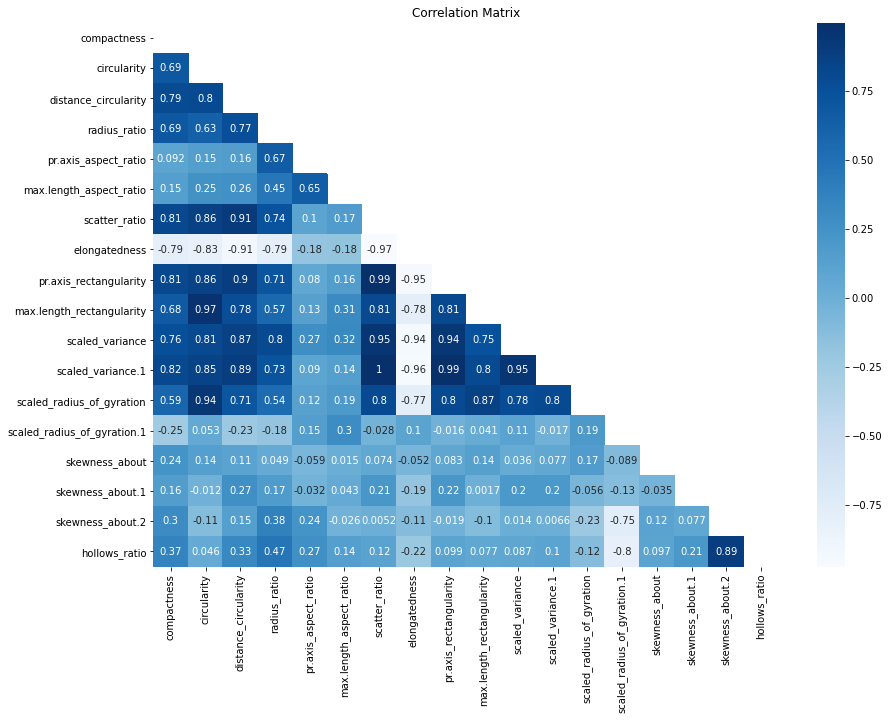

In [9]:
mask = np.triu(np.ones_like(df.corr()))
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, mask=mask, cmap='Blues')
plt.title('Correlation Matrix');

### Data Preparation

In [10]:
df.groupby(['class']).mean()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
class,,,,,,,,,,,,,,,,,,
bus,91.591743,44.981308,76.767442,165.708333,63.414747,7.013761,170.022936,40.114679,20.580645,146.701835,192.889908,448.894495,181.032407,77.096774,4.794393,10.211009,187.811927,191.325688
car,96.184149,46.035047,88.878788,180.591549,60.992991,8.825175,181.053738,38.093458,21.511682,149.967366,197.894614,500.543326,179.613054,69.924883,7.126464,15.170561,189.474299,197.582751
van,90.562814,42.070352,73.247475,147.176768,61.261307,9.713568,141.537688,47.939698,18.575758,145.175879,163.964646,298.201005,157.276382,72.778894,6.417085,9.698492,188.939698,196.145729


In [11]:
X = df.groupby(['class']).transform(lambda x: x.fillna(x.mean())) # filling the missing values
Y = df['class']

print('Number of missing values in the updated dataset = ', X.isna().any().sum())
X.head()

Number of missing values in the updated dataset =  0


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=1)
x_train.shape, x_test.shape

((592, 18), (254, 18))

In [13]:
# Dataset Normalization
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=X.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=X.columns)

### Building Models

In [14]:
svm_model = SVC(C=3)

In [15]:
k = KFold(n_splits=5)
cv_pred = cross_val_predict(svm_model, x_train, y_train, cv=k, n_jobs=-1)

Classification report of training and testing model on training-set by using all 18 features:

              precision    recall  f1-score   support

         bus       0.99      0.98      0.98       159
         car       0.98      0.98      0.98       296
         van       0.94      0.95      0.94       137

    accuracy                           0.97       592
   macro avg       0.97      0.97      0.97       592
weighted avg       0.97      0.97      0.97       592



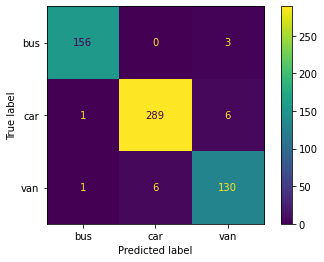

In [16]:
print('Classification report of training and testing model on training-set by using all 18 features:\n')
ConfusionMatrixDisplay(confusion_matrix(y_train, cv_pred), display_labels=['bus','car','van']).plot();
print(classification_report(y_train, cv_pred))

In [17]:
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

Classification report of testing model on testing-set using all 18 features:

              precision    recall  f1-score   support

         bus       0.94      1.00      0.97        59
         car       0.98      0.95      0.97       133
         van       0.92      0.92      0.92        62

    accuracy                           0.96       254
   macro avg       0.95      0.96      0.95       254
weighted avg       0.96      0.96      0.96       254



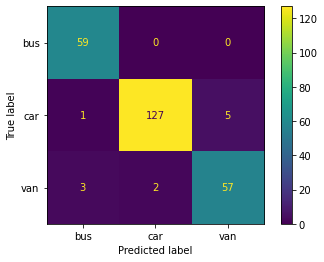

In [18]:
print('Classification report of testing model on testing-set using all 18 features:\n')

labels = ['bus','car','van']
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=labels).plot();
print(classification_report(y_test, y_pred))

### Dimensionality Reduction with PCA

In [19]:
print('The total number of features: ', len(x_train.columns))

The total number of features:  18


In [20]:
# computing the accuracy score of training the model with the minimum to maximum number of features (1 to 18)
# using PCA to reduce the number of features and gaining principal components
scores =[]

for n in range(1,19):
    pca = PCA(n_components=n)
    principal_components = pca.fit_transform(x_train)
    principal_df = pd.DataFrame(principal_components)
    cv_scores = cross_val_score(SVC(C=3), principal_df, y_train, cv=k, n_jobs=-1)
    scores.append(cv_scores.mean())

[0.6, 0.67, 0.74, 0.77, 0.78, 0.91, 0.92, 0.94, 0.95, 0.96, 0.96, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97]


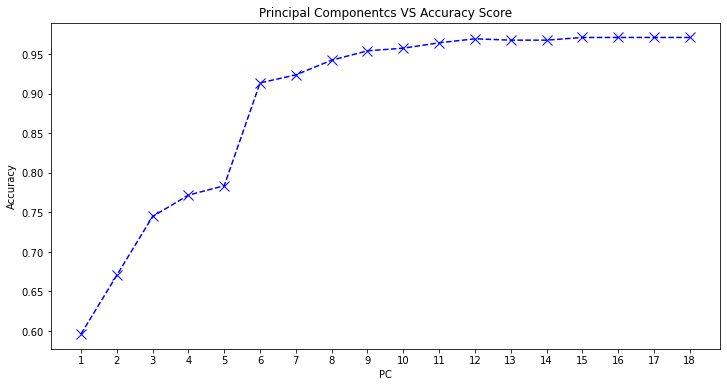

In [21]:
plt.figure(figsize=(12,6))
plt.plot(range(1,19), scores, 'bx--', markersize=10)
plt.xticks(ticks=range(1,19))
plt.xlabel('PC')
plt.ylabel('Accuracy')
plt.title('Principal Componentcs VS Accuracy Score');

print([round(num,2) for num in scores])

**9 principal components** can make 95% accurate classification.

In [22]:
pca = PCA(n_components=9)
pc_train = pd.DataFrame(pca.fit_transform(x_train))
pc_test = pd.DataFrame(pca.transform(x_test))

              precision    recall  f1-score   support

         bus       0.98      0.96      0.97       159
         car       0.98      0.96      0.97       296
         van       0.88      0.93      0.91       137

    accuracy                           0.95       592
   macro avg       0.95      0.95      0.95       592
weighted avg       0.96      0.95      0.95       592



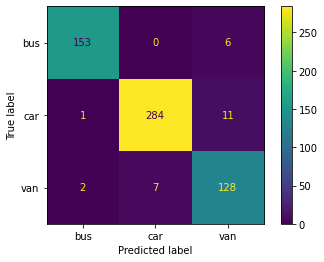

In [23]:
svm_model2 = SVC(C=3)

cv_pred2 =cross_val_predict(svm_model2, pc_train, y_train, cv=k, n_jobs=-1)
print(classification_report(y_train, cv_pred2))
ConfusionMatrixDisplay(confusion_matrix(y_train, cv_pred2), display_labels=labels).plot();

In [24]:
svm_model2.fit(pc_train, y_train)

SVC(C=3)

              precision    recall  f1-score   support

         bus       0.94      0.98      0.96        59
         car       0.95      0.95      0.95       133
         van       0.92      0.89      0.90        62

    accuracy                           0.94       254
   macro avg       0.94      0.94      0.94       254
weighted avg       0.94      0.94      0.94       254



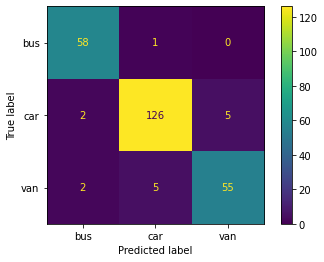

In [25]:
y_pred2 = svm_model2.predict(pc_test)
print(classification_report(y_test, y_pred2))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred2), display_labels=labels).plot();